### Test per verificare l'efficienza di ourPolynomial

In [ ]:

def parse5(poli):                                    #poli è una stringa che rappresenta un input polinomiale da parte dell'utente
    '''inizializzo il polinomio'''
    s=''                                            #stringa ausiliaria per salvare i vari coefficienti da trasformare in interi
    m=np.array([[0,0,0,0,0]])                       #lista che sarà la lista di monomi
    test=0
    
    for c in poli:                                  #[forse non serve a niente, ma] riempio m con il giusto numero di liste indicizzate a 0
        if c in ['+','-'] and poli[test-2:test] not in ['(x','(y']:
            m=np.append(m,[[0,0,0,0,0]],axis=0)
        test=test+1
    if poli[0]=='-' or (poli[0]=='(' and poli[1]=='-'):               #in questo caso ne sto mettendo uno di troppo, la tolgo (si presuppone che la stringa non inizi con +)
        m=np.delete(m,0)

    #aggiungiamo gli shift
    shift=np.array([[0,0,0,0]])                                 #lista degli shift in ogni monomio
    for mono in m[1:]:
        shift=np.append(shift,[[0,0,0,0]],axis=0)
    shift_test=0
    
    i=0                #indice per percorrere la lista m
    p=0                #indice di parità che distingue numero [posizione 0] coseno [posizione 1 e 3] e seno [posizione 2 e 4] mi dice dove mettere il coeff che ho salvato
    test=0             #conto le iterazioni, serve per controllare la s di cos
    '''riempio m e shift con i coefficienti giusti'''
    for c in poli:
        
        if c==')' and shift_test==1:                                #se ho trovato uno shift(test in fondo quando trovo x o y) lo inserisco nella lista degli shift
            if s=='+' or s=='-':
                print('ERRORE DI SINTASSI')
                return 0
            else:
                shift[i,p]=int(s)
                s=''
                shift_test=0
            p=0

        if c in ['+','-','0','1','2','3','4','5','6','7','8','9']:
            s+=c                                                    #aggiungo tutti i caratteri numerici alla stringa ausiliaria fichè finiscono i numeri, poi posiziono questo coeff nel punto giusto
            if (c in ['+','-']) and m[0,0]!=0 and (shift_test==0):  #vuol dire che ho già incontrato un monomio e ne sto incontrando un altro; assumo che l'utente non metta 0 come primo coefficiente...
                i=i+1                                               #quindi incremento l'indice che scorre m

        if c=='c':                              #ho incontrato un coseno (o risp a x o risp a y )
            if s in ['+','-']:                  #vuol dire che sono a inizio polinomio e ho cos o -cos
                m[i,p]=int(s+'1')
                s=''
            elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (p=0) il coeffisciente che ho salvato in s                
                m[i,p]=int(s)
                s=''
            elif m[0,0]==0:                     #per salvare il primissimo coeff, che se è positivo non ha + davanti; assumo che l'utente non metta 0 come primo coefficiente...
                if s=='':
                    m[i,p]=1
                else:
                    m[i,p]=int(s)
                    s=''
            p=1
        if c=='s':                              
            if poli[test-2]!='c':                   #ho un seno (o risp a x o risp a y), il test True vuol dire che non è la s di cos
                if s in['+','-']:                   #vuol dire che sono a inizio polinomio e ho sen o -sen
                    m[i,p]=int(s+'1')
                    s=''
                elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (qui p=0) il coeffisciente che ho salvato in s
                    m[i,p]=int(s)
                    s=''
                elif m[0,0]==0:                     #per salvare il primissimo coeff; assumo che l'utente non metta 0 come primo coefficiente..
                    if s=='':
                        m[i,p]=1
                    else:                           
                        m[i,p]=int(s)
                        s=''
                p=2

        if c=='x':                                  #ho trovato un fattore, cosx se p=0, senx se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0     
            if s=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(s)
                s=''
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0
        if c=='y':                                  #ho trovato un fattore, cosy se p=0, seny se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            p=p+2                                   #poichè ho y incremento di 2 la posizione in cui salvare il coefficiente
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0
            if s=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(s)
                s=''  
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0         
        test=test+1
    return [m,shift]                                        #per ora ritorno la lista, perchè mi tornava comodo, altrimenti si farà return ourPolynomial(m)

In [ ]:
def parse2(poli):                                    #poli è una stringa che rappresenta un input polinomiale da parte dell'utente
    '''inizializzo il polinomio'''
    s=''                                            #stringa ausiliaria per salvare i vari coefficienti da trasformare in interi
    m=np.array([[0,0,0,0,0]])                       #lista che sarà la lista di monomi
    test=0
    
    for c in poli:                                  #[forse non serve a niente, ma] riempio m con il giusto numero di liste indicizzate a 0
        if c in ['+','-'] and poli[test-2:test] not in ['(x','(y']:
            m=np.append(m,[[0,0,0,0,0]],axis=0)
        test=test+1
    if poli[0]=='-' or (poli[0]=='(' and poli[1]=='-'):               #in questo caso ne sto mettendo uno di troppo, la tolgo (si presuppone che la stringa non inizi con +)
        m=np.delete(m,0)

    #aggiungiamo gli shift
    shift=np.array([[0,0,0,0]])                                 #lista degli shift per ogni monomio
    for mono in m[1:]:
        shift=np.append(shift,[[0,0,0,0]],axis=0)
    shift_test=0
    
    i=0                #indice per percorrere la lista m
    p=0                #indice di parità che distingue numero [posizione 0] coseno [posizione 1 e 3] e seno [posizione 2 e 4] mi dice dove mettere il coeff che ho salvato
    test=0             #conto le iterazioni, serve per controllare la s di cos
    '''riempio m con i coefficienti giusti'''
    for c in poli:
        
        if c==')' and shift_test==1:                                #se ho trovato uno shift(test in fondo quando trovo x o y) lo inserisco nella lista degli shift
            if s=='+' or s=='-':
                print('ERRORE DI SINTASSI')
                return 0
            else:
                shift[i,p]=int(s)
                s=''
                shift_test=0
            p=0

        if c in ['+','-','0','1','2','3','4','5','6','7','8','9']:
            s+=c                                                    #aggiungo tutti i caratteri numerici alla stringa ausiliaria fichè finiscono i numeri, poi posiziono questo coeff nel punto giusto
            if (c in ['+','-']) and m[0,0]!=0 and (shift_test==0):  #vuol dire che ho già incontrato un monomio e ne sto incontrando un altro; assumo che l'utente non metta 0 come primo coefficiente...
                i=i+1                                               #quindi incremento l'indice che scorre m

        if c=='c':                              #ho incontrato un coseno (o risp a x o risp a y )
            if s in ['+','-']:                  #vuol dire che sono a inizio polinomio e ho cos o -cos
                m[i,p]=int(s+'1')
                s=''
            elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (p=0) il coeffisciente che ho salvato in s                
                m[i,p]=int(s)
                s=''
            elif m[0,0]==0:                     #per salvare il primissimo coeff, che se è positivo non ha + davanti; assumo che l'utente non metta 0 come primo coefficiente...
                if s=='':
                    m[i,p]=1
                else:
                    m[i,p]=int(s)
                    s=''
            p=1
        if c=='s':                              
            if poli[test-2]!='c':                   #ho un seno (o risp a x o risp a y), il test True vuol dire che non è la s di cos
                if s in['+','-']:                   #vuol dire che sono a inizio polinomio e ho sen o -sen
                    m[i,p]=int(s+'1')
                    s=''
                elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (qui p=0) il coeffisciente che ho salvato in s
                    m[i,p]=int(s)
                    s=''
                elif m[0,0]==0:                     #per salvare il primissimo coeff; assumo che l'utente non metta 0 come primo coefficiente..
                    if s=='':
                        m[i,p]=1
                    else:                           
                        m[i,p]=int(s)
                        s=''
                p=2

        if c=='x':                                  #ho trovato un fattore, cosx se p=0, senx se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0     
            if s=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(s)
                s=''
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0
        if c=='y':                                  #ho trovato un fattore, cosy se p=0, seny se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            p=p+2                                   #poichè ho y incremento di 2 la posizione in cui salvare il coefficiente
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0
            if s=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(s)
                s=''  
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0         
        test=test+1
    return [m,shift]                                        #per ora ritorno la lista, perchè mi tornava comodo, altrimenti si farà return ourPolynomial(m)

In [ ]:
def parse4(poli):                                    #poli è una stringa che rappresenta un input polinomiale da parte dell'utente
    '''inizializzo il polinomio'''
    s=''                                            #stringa ausiliaria per salvare i vari coefficienti da trasformare in interi
    m=np.array([[0,0,0,0,0]])                       #lista che sarà la lista di monomi
    test=0
    shift_test=0

    for c in poli:                                 #[forse non serve a niente, ma] riempio m con il giusto numero di liste indicizzate a 0
        if c in ['x','y']:
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
        if c in ['+','-'] and shift_test==0:
            m=np.append(m,[[0,0,0,0,0]],axis=0)
        elif c in ['+','-'] and shift_test==1:
            shift_test=0
        test=test+1
    if poli[0] in '+-' or (poli[0]=='(' and poli[1] in '-+'):               #in questo caso ne sto mettendo uno di troppo, la tolgo
        m=np.delete(m,0,0)

    #aggiungiamo gli shift
    shift=np.array([[0,0,0,0]])                                #lista degli shift per ogni monomio
    molt=np.array([[1,1,1,1]])                                 #lista dei coeff che moltiplicano x e y per ogni monomio
    for mono in m[1:]:
        shift=np.append(shift,[[0,0,0,0]],axis=0)
        molt=np.append(molt,[[1,1,1,1]],axis=0)
    
    shift_test=0       #test che mi dice se il prossimo coefficiente numerico che troverò sarò uno shift
    molt_test=0        #test che mi dice se il prossimo coefficiente numerico che troverò sarò un moltiplicatore di x o y
    i=0                #indice per percorrere la lista m
    p=0                #indice di parità che distingue numero [posizione 0] coseno [posizione 1 e 3] e seno [posizione 2 e 4] mi dice dove mettere il coeff che ho salvato
    test=0             #conto le iterazioni, serve per controllare la s di cos
    test2=0
    temp=''
    '''riempio m con i coefficienti giusti'''
    for c in poli:
        if c=='(':
            test2=test
            for c in poli[test+1:]:
                if c in ['-','0','1','2','3','4','5','6','7','8','9'] and molt_test==0:
                    test2=test2+1
                else:
                    if test2>test and poli[test2+1] in ['x','y']:
                        molt_test=1                                 #vuol dire che troverò un coefficiente moltiplicativo di x o y
                        test2=0
                    elif molt_test!=1:
                        molt_test=2                                 #vuol dire che non troverò un coefficiente moltilpicativo di x o y
            if molt_test==2:
                molt_test=0

        if molt_test==1 and temp=='':
            temp=s
            s=''

        if c==')' and shift_test==1:                                #se ho trovato uno shift(test in fondo quando trovo x o y) lo inserisco nella lista degli shift
            if s=='+' or s=='-':
                print('ERRORE DI SINTASSI')
                return 0
            else:
                shift[i,p-1]=int(s)
                s=''
                shift_test=0
            p=0

        if c in ['+','-','0','1','2','3','4','5','6','7','8','9']:
            s+=c                                                    #aggiungo tutti i caratteri numerici alla stringa ausiliaria fichè finiscono i numeri, poi posiziono questo coeff nel punto giusto
            if (c in ['+','-']) and m[0,0]!=0 and (shift_test==0):  #vuol dire che ho già incontrato un monomio e ne sto incontrando un altro; assumo che l'utente non metta 0 come primo coefficiente...
                i=i+1                                               #quindi incremento l'indice che scorre m

        if c=='c':                              #ho incontrato un coseno (o risp a x o risp a y )
            if s in ['+','-']:                  #vuol dire che sono a inizio polinomio e ho cos o -cos
                m[i,p]=int(s+'1')
                s=''
            elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (p=0) il coeffisciente che ho salvato in s                
                m[i,p]=int(s)
                s=''
            elif m[0,0]==0:                     #per salvare il primissimo coeff, che se è positivo non ha + davanti; assumo che l'utente non metta 0 come primo coefficiente...
                if s=='':
                    m[i,p]=1
                else:
                    m[i,p]=int(s)
                    s=''
            p=1
        if c=='s':                              
            if poli[test-2]!='c':                   #ho un seno (o risp a x o risp a y), il test True vuol dire che non è la s di cos
                if s in['+','-']:                   #vuol dire che sono a inizio polinomio e ho sen o -sen
                    m[i,p]=int(s+'1')
                    s=''
                elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (qui p=0) il coeffisciente che ho salvato in s
                    m[i,p]=int(s)
                    s=''
                elif m[0,0]==0:                     #per salvare il primissimo coeff; assumo che l'utente non metta 0 come primo coefficiente..
                    if s=='':
                        m[i,p]=1
                    else:                           
                        m[i,p]=int(s)
                        s=''
                p=2

        if c=='x':                                  #ho trovato un fattore, cosx se p=0, senx se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            if molt_test==1:                        #vuol dir che il numero che ho appena salvato in s è un coefficiente moltiplicativo di x
                if s in ['+','-']:
                    molt[i,p-1]=int(s+'1')
                else:
                    molt[i,p-1]=int(s)
                s=''
                molt_test=0
            else:
                temp=s
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0     
            if temp=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(temp)
                s=''
            temp=''
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0
        if c=='y':                                  #ho trovato un fattore, cosy se p=0, seny se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            p=p+2                                   #poichè ho y incremento di 2 la posizione in cui salvare il coefficiente
            if molt_test==1:                        #vuol dir che il numero che ho appena salvato in s è un coefficiente moltiplicativo di x
                if s in ['+','-']:
                    molt[i,p-1]=int(s+'1')                    
                else:
                    molt[i,p-1]=int(s)
                s=''
                molt_test=0
            else:
                temp=s
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0     
            if temp=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(temp)
                s=''
            temp=''
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0     
        test=test+1
        size=np.size(m,0)
        l=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0]])
        for i in np.arange(1,size+1,1):
            l=np.append(l,[[0,0,0,0,0,0,0,0,0,0,0,0,0]],axis=0)
            temp=list(np.append(np.append(m[i-1],shift[i-1]),molt[i-1]))
            for j in np.arange(0,13,1):
                l[i,j]=temp[j]
        l=np.delete(l,0,0)
        polinomio=ourPolynomial(l)
    return polinomio
    #return [m,shift,molt]                                        #per ora ritorno la lista, perchè mi tornava comodo, altrimenti si farà return ourPolynomial(m)

In [ ]:
#ora voglio provare anche a mettere dei coefficienti davanti a x e y ---> ammettere cos(2x)
def parse3(poli):                                    #poli è una stringa che rappresenta un input polinomiale da parte dell'utente
    '''inizializzo il polinomio'''
    s=''                                            #stringa ausiliaria per salvare i vari coefficienti da trasformare in interi
    m=np.array([[0,0,0,0,0]])                       #lista che sarà la lista di monomi
    test=0
    shift_test=0

    for c in poli:                                 #[forse non serve a niente, ma] riempio m con il giusto numero di liste indicizzate a 0
        if c in ['x','y']:
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
        if c in ['+','-'] and shift_test==0:
            m=np.append(m,[[0,0,0,0,0]],axis=0)
        elif c in ['+','-'] and shift_test==1:
            shift_test=0
        test=test+1
    if poli[0] in '+-' or (poli[0]=='(' and poli[1] in '-+'):               #in questo caso ne sto mettendo uno di troppo, la tolgo
        m=np.delete(m,0,0)

    #aggiungiamo gli shift
    shift=np.array([[0,0,0,0]])                                #lista degli shift per ogni monomio
    molt=np.array([[1,1,1,1]])                                 #lista dei coeff che moltiplicano x e y per ogni monomio
    for mono in m[1:]:
        shift=np.append(shift,[[0,0,0,0]],axis=0)
        molt=np.append(molt,[[1,1,1,1]],axis=0)
    
    shift_test=0       #test che mi dice se il prossimo coefficiente numerico che troverò sarò uno shift
    molt_test=0        #test che mi dice se il prossimo coefficiente numerico che troverò sarò un moltiplicatore di x o y
    i=0                #indice per percorrere la lista m
    p=0                #indice di parità che distingue numero [posizione 0] coseno [posizione 1 e 3] e seno [posizione 2 e 4] mi dice dove mettere il coeff che ho salvato
    test=0             #conto le iterazioni, serve per controllare la s di cos
    test2=0
    temp=''
    '''riempio m con i coefficienti giusti'''
    for c in poli:
        if c=='(':
            test2=test
            for c in poli[test+1:]:
                if c in ['-','0','1','2','3','4','5','6','7','8','9'] and molt_test==0:
                    test2=test2+1
                else:
                    if test2>test and poli[test2+1] in ['x','y']:
                        molt_test=1                                 #vuol dire che troverò un coefficiente moltiplicativo di x o y
                        test2=0
                    elif molt_test!=1:
                        molt_test=2                                 #vuol dire che non troverò un coefficiente moltilpicativo di x o y
            if molt_test==2:
                molt_test=0

        if molt_test==1 and temp=='':
            temp=s
            s=''

        if c==')' and shift_test==1:                                #se ho trovato uno shift(test in fondo quando trovo x o y) lo inserisco nella lista degli shift
            if s=='+' or s=='-':
                print('ERRORE DI SINTASSI')
                return 0
            else:
                shift[i,p-1]=int(s)
                s=''
                shift_test=0
            p=0

        if c in ['+','-','0','1','2','3','4','5','6','7','8','9']:
            s+=c                                                    #aggiungo tutti i caratteri numerici alla stringa ausiliaria fichè finiscono i numeri, poi posiziono questo coeff nel punto giusto
            if (c in ['+','-']) and m[0,0]!=0 and (shift_test==0):  #vuol dire che ho già incontrato un monomio e ne sto incontrando un altro; assumo che l'utente non metta 0 come primo coefficiente...
                i=i+1                                               #quindi incremento l'indice che scorre m

        if c=='c':                              #ho incontrato un coseno (o risp a x o risp a y )
            if s in ['+','-']:                  #vuol dire che sono a inizio polinomio e ho cos o -cos
                m[i,p]=int(s+'1')
                s=''
            elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (p=0) il coeffisciente che ho salvato in s                
                m[i,p]=int(s)
                s=''
            elif m[0,0]==0:                     #per salvare il primissimo coeff, che se è positivo non ha + davanti; assumo che l'utente non metta 0 come primo coefficiente...
                if s=='':
                    m[i,p]=1
                else:
                    m[i,p]=int(s)
                    s=''
            p=1
        if c=='s':                              
            if poli[test-2]!='c':                   #ho un seno (o risp a x o risp a y), il test True vuol dire che non è la s di cos
                if s in['+','-']:                   #vuol dire che sono a inizio polinomio e ho sen o -sen
                    m[i,p]=int(s+'1')
                    s=''
                elif s!='' and s[0] in ['+','-']:   #vuol dire che sono a inizio monomio, quindi salvo in posizione 0 (qui p=0) il coeffisciente che ho salvato in s
                    m[i,p]=int(s)
                    s=''
                elif m[0,0]==0:                     #per salvare il primissimo coeff; assumo che l'utente non metta 0 come primo coefficiente..
                    if s=='':
                        m[i,p]=1
                    else:                           
                        m[i,p]=int(s)
                        s=''
                p=2

        if c=='x':                                  #ho trovato un fattore, cosx se p=0, senx se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            if molt_test==1:                        #vuol dir che il numero che ho appena salvato in s è un coefficiente moltiplicativo di x
                if s in ['+','-']:
                    molt[i,p-1]=int(s+'1')
                else:
                    molt[i,p-1]=int(s)
                s=''
                molt_test=0
            else:
                temp=s
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0     
            if temp=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(temp)
                s=''
            temp=''
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0
        if c=='y':                                  #ho trovato un fattore, cosy se p=0, seny se p=2, inserisco il coefficiente trovato nell'iterazione precedenti
            p=p+2                                   #poichè ho y incremento di 2 la posizione in cui salvare il coefficiente
            if molt_test==1:                        #vuol dir che il numero che ho appena salvato in s è un coefficiente moltiplicativo di x
                if s in ['+','-']:
                    molt[i,p-1]=int(s+'1')                    
                else:
                    molt[i,p-1]=int(s)
                s=''
                molt_test=0
            else:
                temp=s
            if m[i,p]!=0:                           #vuol dire che in quel monomio ho già inserito l'esponente relativo a quel fattore
                print('ERRORE DI SINTASSI')
                return 0     
            if temp=='':                               #caso in cui ho esponente 1 e non ho scritto ^1
                m[i,p]=1
            else:
                m[i,p]=int(temp)
                s=''
            temp=''
            if len(poli)>test+1:
                if poli[test+1] in ['+','-'] and poli[test+2] in ['0','1','2','3','4','5','6','7','8','9',')']:     #controllo se ho uno shift
                    shift_test=1
                else:
                    p=0     
        test=test+1
    return [m,shift,molt]                                        #per ora ritorno la lista, perchè mi tornava comodo, altrimenti si farà return ourPolynomial(m)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
import numdifftools as nd
from ourPolynomial import *
from ProgrammaEPG import *

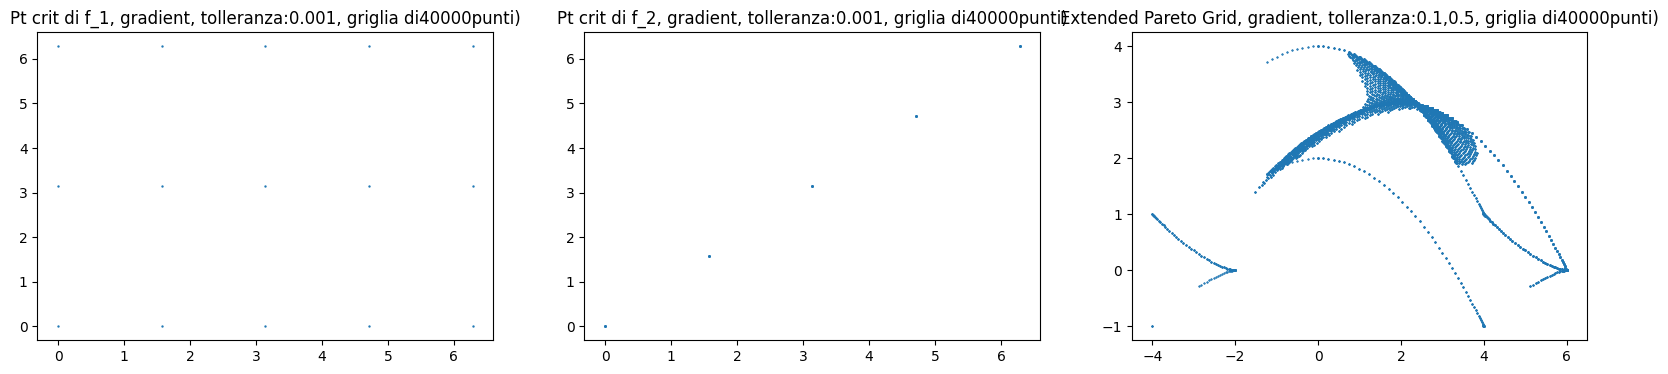

In [2]:
g_1=parse('2cos^2(x)+4cos(y)')
g_2=parse('sen^3(x)+3sen^2(y)')
EPG(g_1,g_2,200,0.001,0.1,0.5,1)

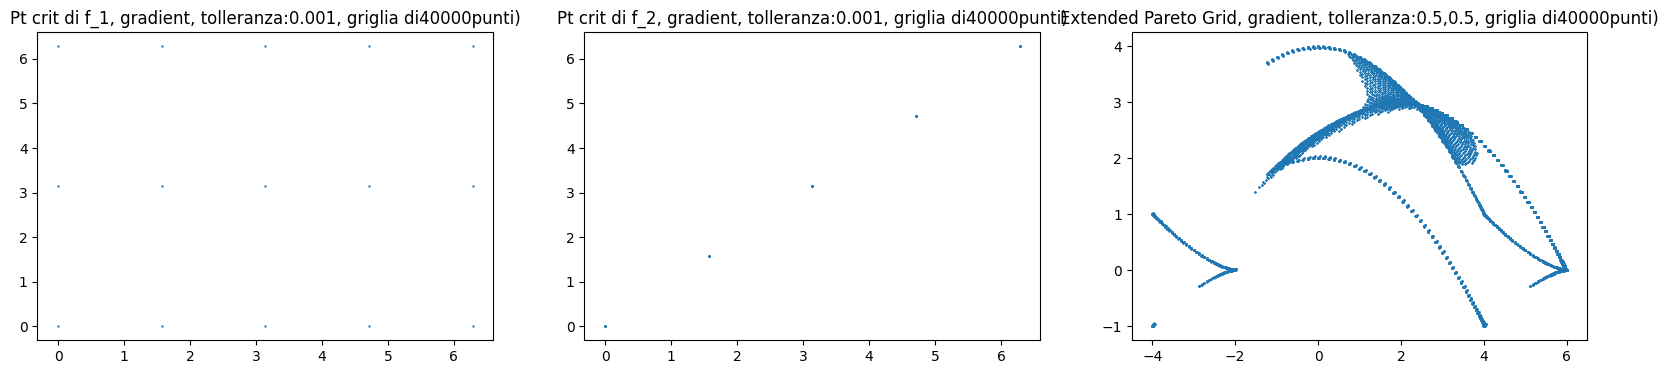

In [4]:
g_1=parse('2cos^2(x)+4cos(y)')
g_2=parse('sen^3(x)+3sen^2(y)')
EPG(g_1,g_2,200,0.001,0.5,0.5,1)

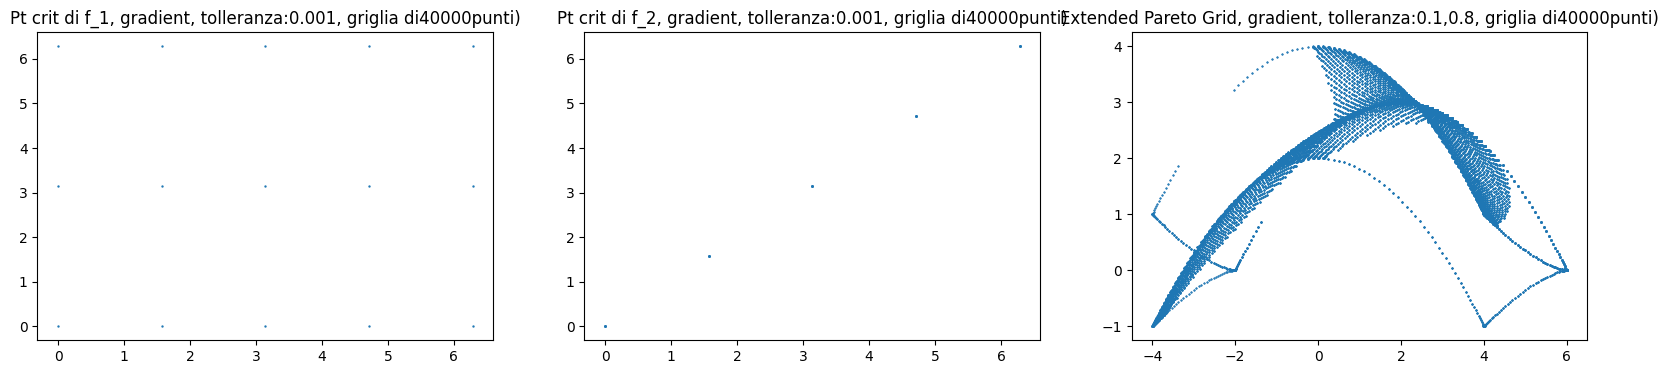

In [5]:
g_1=parse('2cos^2(x)+4cos(y)')
g_2=parse('sen^3(x)+3sen^2(y)')
EPG(g_1,g_2,200,0.001,0.1,0.8,1)

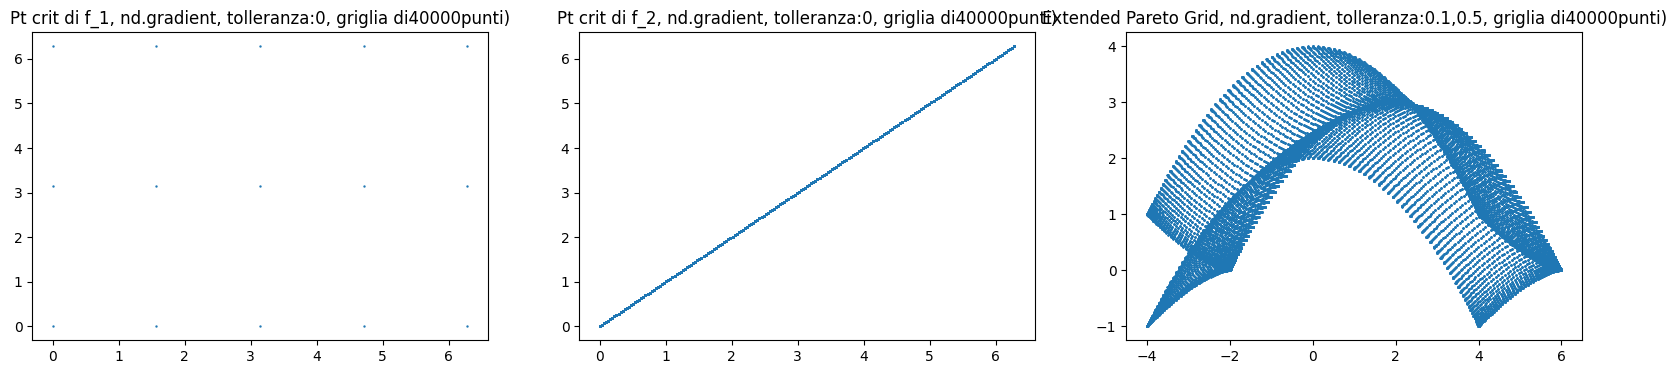

In [3]:
def g_1(x):
    return 2*np.cos(x[0])**2+4*np.cos(x[1])

def g_2(x):
    return 1*np.sin(x[0])**3+3*np.sin(x[1])**2
EPG(g_1,g_2,200,0,0.1,0.5,0)

In [6]:
g_1=parse('2cos^2(x)+4cos(y)')
g_2=parse('sen^3(x)+3sen^2(y)')
print(g_1.__str__())

2cos^2(x)+4cos(y)
